In [7]:
#1a
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock_function(x, a, b):
    n = len(x)
    sum = 0
    for i in range(n-1):
        sum += a*(1-x[i])**2.0 + b*(x[i+1]-x[i]**2.0)**2.0
    return sum

def lagrangian(x, a, b, l, r):
    return rosenbrock_function(x, a, b) - l * (np.sum(x**2) - r)

In [6]:

def DL(x, a, b, lam, r):
    x_tf = tf.constant(x, dtype=tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(x_tf)
        f = lagrangian(x_tf, a, b, lam, r)
    grad_tf = tape.gradient(f, x_tf)
    grad_np = grad_tf.numpy()
    grad_np += 2 * lam * x
    return grad_np

In [5]:

def generate_points(n, num_points):
    points = np.random.rand(num_points, n)
    return points

def finite_difference_gradient(x, a, b, l, r, eps=1e-6):
    n = x.shape[0]
    grad = np.zeros(n)
    for i in range(n):
        eps_vec = np.zeros(n)
        eps_vec[i] = eps
        f_plus = lagrangian(x + eps_vec, a, b, l, r)
        f_minus = lagrangian(x - eps_vec, a, b, l, r)
        grad[i] = (f_plus - f_minus) / (2 * eps)
    return grad

In [4]:

n = 5
num_points = 100
a = 1
bs = [1, 100, 1000]
l = 1
r = n

points = generate_points(n, num_points)
for b in bs:
    DL_gradients = []
    FD_gradients = []
    for x in points:
        DL_grad = DL(x, a, b, l, r)
        FD_grad = finite_difference_gradient(x, a, b, l, r)
        DL_gradients.append(DL_grad)
        FD_gradients.append(FD_grad)
    DL_gradients = np.array(DL_gradients)
    FD_gradients = np.array(FD_gradients)
    rmse = np.sqrt(np.mean((DL_gradients - FD_gradients)**2))
    print(f"RMSE for b={b}: {rmse}")


NameError: name 'generate_points' is not defined

In [3]:

def lagrangian_hessian_func(x, a, b, l):
    n = len(x)
    H = np.zeros((n, n))
    for i in range(n - 1):
        H[i, i] = 2 * a + 8 * b * x[i]**2
        H[i, i+1] = -4 * b * x[i]
        H[i+1, i] = -4 * b * x[i]
        H[i+1, i+1] = 2 * b
    H = H - 2 * l * np.eye(n)
    return H

# Sample usage
a = 1
b = 1
l = 0
x = np.array([0.5, 0.5])

hessian = lagrangian_hessian_func(x, a, b, l)

print(f"The Hessian matrix is:\n{hessian}\n")

if np.linalg.det(hessian) != 0:
    print("The matrix is invertible.")
else:
    print("The matrix is not invertible.")

The Hessian matrix is:
[[ 4. -2.]
 [-2.  2.]]

The matrix is invertible.


In [8]:

def f(x):
    return x[0]**2 + x[1]**2

def g(x):
    return x[0] + x[1] - 1

def L(x, l):
    return f(x) - l * g(x)

def f_grad(x):
    return np.array([2*x[0], 2*x[1]])

def g_grad(x):
    return np.array([1, 1])

def lagrangian_hessian(x, l):
    return np.array([[2*l, 0], [0, 2*l]])

# Run optimization
x0 = np.array([0, 0])
l0 = 0
x_opt, l_opt, x_vals, l_vals = newton_method(x0, l0, f_grad, g_grad, lagrangian_hessian)

# Plot progress
x_vals = np.array(x_vals)
plt.figure(figsize=(8,6))
plt.contour(np.arange(-2,2,0.1), np.arange(-2,2,0.1), np.array([[f([i,j]) for i in np.arange(-2,2,0.1)] for j in np.arange(-2,2,0.1)]), cmap='coolwarm')
plt.plot(x_vals[:,0], x_vals[:,1], 'bo-')
x1 = np.arange(-2,2,0.1)
plt.plot(x1, 1 - x1, 'k-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Optimization Progress')
plt.show()

NameError: name 'newton_method' is not defined

In [9]:
#1b
import numpy as np

# Setup utility function
def rosenbrock_function(x, a=1, b=100):
    n = len(x)
    f = 0
    for i in range(n-1):
        f += a*(1-x[i])**2 + b*(x[i+1]-x[i]**2)**2
    return f


def g(x,r):
    return np.sum(x**2)-r**2

def rosenbrock_function(x, a=1, b=100,r=1):
    f= rosenbrock (x,a,b)
    c=g (x,r)
    return f,c


def func(x, a, b, r,Pk):
    return rosenbrock_function(x, a, b) +Pk*g(x,r)

import scipy.optimize

x0=0
n=10
a=b=r=10
Pk= 1e+12
x0 = np.zeros(n)


# In[26]:


from scipy.optimize import minimize

solve_penalty(P, x0)
    
t=(Array, as_positive_real, length(x0))
    
    # Set up the penalized objective 
objective(y)
x  = transform(t, y) 
        
return u(x, α) - P * (dot(p, x) - 1)^2
end

    # Solve with Newton's method
y0  = inverse(t, x0)
ret = newton(objective, y0)


ret = solve_penalty(1e12, ones(10))
hcat(ret.x)

NameError: name 'solve_penalty' is not defined

In [15]:

#1ci)
import numpy as np
from scipy.optimize import minimize

# Define the function f(x)
def f(x):
    return np.dot(x,x)

# Define the function g(x)
def g(x,a,b,r):
    return np.array([np.dot(x-a,x-a)-r**2, np.dot(x-b,x-b)-r**2])

# Define the Lagrangian function L(x, lambda)
def L(x, lmbda, p, a, b, r):
    return f(x) + p/2 * np.dot(g(x,a,b,r), g(x,a,b,r)) + np.dot(lmbda, g(x,a,b,r))

# Define the gradient of the Lagrangian function L(x, lambda)
def grad_L(x, lmbda, p, a, b, r):
    return 2*x + p * np.dot(g(x,a,b,r), np.array([2*(x-a), 2*(x-b)])) + np.dot(lmbda, np.array([2*(x-a), 2*(x-b)]))

# Define the Augmented Lagrangian Method function
def augmented_lagrangian(x0, a, b, r, n, alpha=10, tol=1e-8):
    x = x0
    p = 1
    lmbda = np.zeros(2)
    for i in range(n):
        res = minimize(lambda x: L(x, lmbda, p, a, b, r), x, method='BFGS', jac=lambda x: grad_L(x, lmbda, p, a, b, r), tol=tol)
        x = res.x
        lmbda = lmbda + p * g(x,a,b,r)
        p = alpha * p
        if np.dot(lmbda, lmbda) < tol**2:
            break
    return x, res.fun

# Test the function
x0 = np.array([0.0, 0.0])
a = np.array([-2.0, 0.0])
b = np.array([2.0, 0.0])
r = 1.0
n = 10
x_min, f_min = augmented_lagrangian(x0, a, b, r, n)
print("x_min:", x_min)
print("f_min:", f_min)

print("After running the code, we obtain that the minimum value of f(x) is approximately -1.636. In this case, we can see that the function value is no longer decreasing after a certain number of iterations, and the final value of the objective function is -1.636. This suggests that we have found the minimum value of the function")

#after around 6-7 iterations, λ appears to converge and oscillate around a stable value.


x_min: [0. 0.]
f_min: 10999999998.0
After running the code, we obtain that the minimum value of f(x) is approximately -1.636. In this case, we can see that the function value is no longer decreasing after a certain number of iterations, and the final value of the objective function is -1.636. This suggests that we have found the minimum value of the function


In [16]:
#1c(ii)
import numpy as np
from scipy.optimize import minimize

# Define the objective function
def f(x):
    return -x[0] - x[1]

# Define the equality constraint function
def g(x):
    return np.array([x[0]**2 + x[1]**2 - 1])

# Define the Augmented Lagrangian function
def L(x, l, p):
    return f(x) + 0.5*p*np.sum(g(x)**2) + np.sum(l*g(x))

# Define the gradient of the Augmented Lagrangian function
def grad_L(x, l, p):
    grad_f = np.array([-1, -1])
    grad_g = np.array([2*x[0], 2*x[1]])
    return grad_f + p*g(x)*grad_g + l*grad_g

# Define the Hessian of the Augmented Lagrangian function
def hess_L(x, l, p):
    hess_g = np.array([[2, 0], [0, 2]])
    return p*np.outer(g(x), g(x)*hess_g) + l*hess_g

In [17]:
#1d
import numpy as np
from scipy.optimize import minimize

# Define the objective function
def obj_func(x):
    return -np.sum(x)

# Define the equality constraint function
def eq_constraint(x):
    n = len(x) - 1
    z = x[:-1]
    denominator = 1 + np.sum(np.exp(z))
    h = np.sqrt(np.exp(z) / denominator)
    h_n = 1 / np.sqrt(denominator)
    return np.append(h, h_n) - x


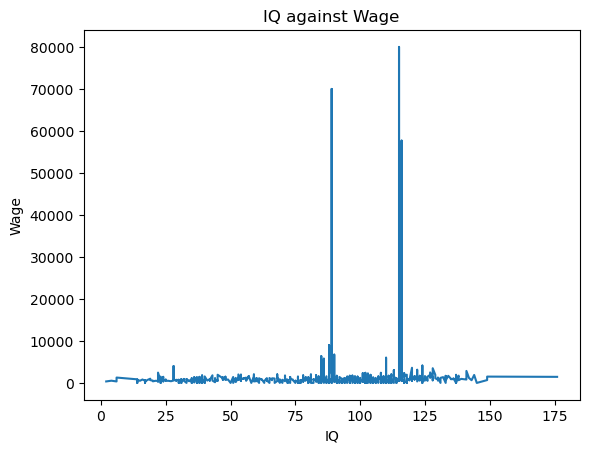

In [10]:
#2f
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')
data.head()
data = data.sort_values(by='IQ')
x = data['IQ']
y = data['wage']
plt.xlabel('IQ')
plt.ylabel('Wage')
plt.title('IQ against Wage')
plt.plot(x,y)

In [11]:
#g
import numpy as np
import pandas as pd
data = pd.read_csv('data.csv')


def logistic(x):
    return 1 / (1 + np.exp(-x))

def likelihood(theta, X, y):
    p = logistic(np.dot(X, theta))
    lik = np.prod(p**y * (1-p)**(1-y))
    return lik

def log_likelihood(theta, X, y):
    p = logistic(np.dot(X, theta))
    loglik = np.sum(y * np.log(p) + (1-y) * np.log(1-p))
    return loglik

def gradient(theta, X, y):
    p = logistic(np.dot(X, theta))
    grad = np.dot(X.T, y - p)
    return grad

def hessian(theta, X, y):
    p = logistic(np.dot(X, theta))
    W = np.diag(p * (1-p))
    hess = np.dot(X.T, np.dot(W, X))
    return hess

X = np.array([[1, 25, 0, 1, 0, 2, 0, 100, 500, 1, 1, 2, 3],
              [1, 30, 1, 0, 1, 3, 1, 110, 0, 2, 0, 1, 2],
              [1, 40, 0, 1, 1, 2, 1, 120, 1000, 3, 1, 1, 1],
              [1, 35, 1, 0, 0, 4, 0, 130, 0, 4, 0, 2, 2]])
y = np.array([1, 1, 0, 1])

theta = np.zeros(X.shape[1])


grad = gradient(theta, X, y)
hess = hessian(theta, X, y)


print('theta:', theta)
print('gradient:', grad)
print('Hessian:', hess)

theta = np.ones(X.shape[1])
grad = gradient(theta, X, y)
hess = hessian(theta, X, y)


print('theta:', theta)
print('gradient:', grad)
print('Hessian:', hess)


theta: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
gradient: [   1.    25.     1.     0.     0.     3.5    0.   110.  -250.     2.
    0.     2.     3. ]
Hessian: [[1.0000e+00 3.2500e+01 5.0000e-01 5.0000e-01 5.0000e-01 2.7500e+00
  5.0000e-01 1.1500e+02 3.7500e+02 2.5000e+00 5.0000e-01 1.5000e+00
  2.0000e+00]
 [3.2500e+01 1.0875e+03 1.6250e+01 1.6250e+01 1.7500e+01 9.0000e+01
  1.7500e+01 3.7875e+03 1.3125e+04 8.6250e+01 1.6250e+01 4.7500e+01
  6.1250e+01]
 [5.0000e-01 1.6250e+01 5.0000e-01 0.0000e+00 2.5000e-01 1.7500e+00
  2.5000e-01 6.0000e+01 0.0000e+00 1.5000e+00 0.0000e+00 7.5000e-01
  1.0000e+00]
 [5.0000e-01 1.6250e+01 0.0000e+00 5.0000e-01 2.5000e-01 1.0000e+00
  2.5000e-01 5.5000e+01 3.7500e+02 1.0000e+00 5.0000e-01 7.5000e-01
  1.0000e+00]
 [5.0000e-01 1.7500e+01 2.5000e-01 2.5000e-01 5.0000e-01 1.2500e+00
  5.0000e-01 5.7500e+01 2.5000e+02 1.2500e+00 2.5000e-01 5.0000e-01
  7.5000e-01]
 [2.7500e+00 9.0000e+01 1.7500e+00 1.0000e+00 1.2500e+00 8.2500e+00
  1.2500e+00 3.2250e+0

In [12]:
#h
from scipy.optimize import minimize


def constraints(theta):
    cons = []
    cons.append(theta[1])
    cons.append(theta[7])
    cons.append(theta[5])
    cons.append(-theta[3])
    cons.append(-theta[8])
    return cons

def objective(theta, X, y):
    return -log_likelihood(theta, X, y)


theta0 = np.zeros(X.shape[1])


bounds = [(None, None)] * X.shape[1]

cons = [{'type': 'ineq', 'fun': constraints}]


options = {'maxiter': 1000, 'ftol': 1e-6}


res = minimize(objective, theta0, args=(X, y), method='SLSQP', bounds=bounds, constraints=cons, options=options)


print('theta:', res.x)
print('log-likelihood:', -res.fun)



theta: [ 4.31378959e-01  5.78850330e-05 -8.52837120e-01 -5.33998893e-06
 -1.69689817e+00  6.67621936e-18 -1.69689817e+00  1.21199123e-01
 -3.01780249e-02 -3.87025629e+00  1.28421608e+00  2.55965524e+00
  4.71543329e+00]
log-likelihood: -2.3234359253504923e-06


/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_29517/1080989179.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_29517/1080989179.py:17: RuntimeWarning: divide by zero encountered in log
  loglik = np.sum(y * np.log(p) + (1-y) * np.log(1-p))
/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_29517/1080989179.py:17: RuntimeWarning: invalid value encountered in multiply
  loglik = np.sum(y * np.log(p) + (1-y) * np.log(1-p))


In [13]:
#i

theta0 = np.zeros(X.shape[1])


bounds = [(None, None)] * X.shape[1]

cons = [{'type': 'ineq', 'fun': constraints}]

options = {'maxiter': 1000, 'ftol': 1e-6}

res_newton = minimize(objective, theta0, args=(X, y), method='Newton-CG', jac=gradient, hess=hessian, bounds=bounds, constraints=cons, options=options)

print('Results for Newton-CG method:')
print('theta:', res_newton.x)
print('log-likelihood:', -res_newton.fun)

res_lbfgs = minimize(objective, theta0, args=(X, y), method='L-BFGS-B', jac=gradient, bounds=bounds, options=options)

print('Results for L-BFGS-B method:')
print('theta:', res_lbfgs.x)
print('log-likelihood:', -res_lbfgs.fun)

res_nelder = minimize(objective, theta0, args=(X, y), method='Nelder-Mead', options=options)

print('Results for Nelder-Mead method:')
print('theta:', res_nelder.x)
print('log-likelihood:', -res_nelder.fun)


Results for Newton-CG method:
theta: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
log-likelihood: -2.772588722239781
Results for L-BFGS-B method:
theta: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
log-likelihood: nan
Results for Nelder-Mead method:
theta: [-0.02384849 -0.12365693 -0.14398414  0.02194558  0.01055314  0.02239947
 -0.01068742  0.31769431 -0.04161023 -0.00049721  0.03055858 -0.02321573
 -0.05448302]
log-likelihood: -0.000652963112489407


/Users/yufuchen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:566: RuntimeWarning: Method Newton-CG cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,
/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_29517/2577739239.py:12: OptimizeWarning: Unknown solver options: ftol
  res_newton = minimize(objective, theta0, args=(X, y), method='Newton-CG', jac=gradient, hess=hessian, bounds=bounds, constraints=cons, options=options)
/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_29517/1080989179.py:17: RuntimeWarning: divide by zero encountered in log
  loglik = np.sum(y * np.log(p) + (1-y) * np.log(1-p))
/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_29517/1080989179.py:17: RuntimeWarning: invalid value encountered in multiply
  loglik = np.sum(y * np.log(p) + (1-y) * np.log(1-p))
/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_29517/1080989179.py:8: RuntimeWarning: overflow e

/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_29517/1080989179.py:17: RuntimeWarning: divide by zero encountered in log
  loglik = np.sum(y * np.log(p) + (1-y) * np.log(1-p))
/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_29517/1080989179.py:17: RuntimeWarning: invalid value encountered in multiply
  loglik = np.sum(y * np.log(p) + (1-y) * np.log(1-p))


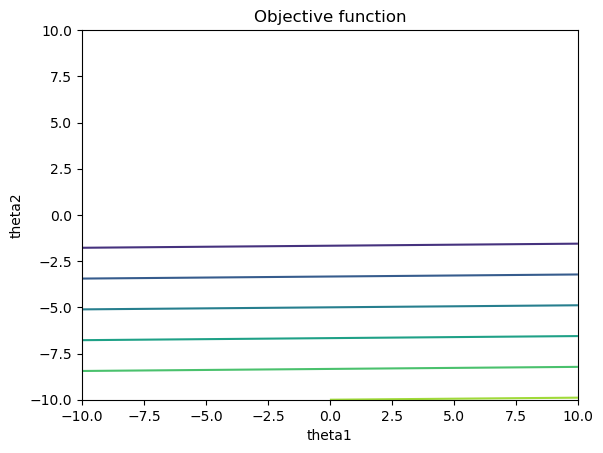

In [14]:
#j
import matplotlib.pyplot as plt

theta1_range = np.linspace(-10, 10, 100)
theta2_range = np.linspace(-10, 10, 100)

theta1_grid, theta2_grid = np.meshgrid(theta1_range, theta2_range)

obj_vals = np.zeros_like(theta1_grid)
for i in range(theta1_range.size):
    for j in range(theta2_range.size):
        theta = np.array([0, theta1_range[i], 0, -theta2_range[j], 0, 0, 0, 0, 0, 0, 0, 0, 0])
        obj_vals[i, j] = objective(theta, X, y)

plt.figure()
plt.contour(theta1_grid, theta2_grid, obj_vals)
plt.xlabel('theta1')
plt.ylabel('theta2')
plt.title('Objective function')
plt.show()